<a href="https://colab.research.google.com/github/dongdong-e/Python/blob/master/%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%20%EA%B8%B0%EB%B0%98%EC%9D%98%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B5%90%EC%9C%A1/2019_04_09_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install surprise
!pip install scikit-surprise

In [0]:
import os
import pandas as pd
from surprise import SVD
from surprise import Dataset

In [0]:
df = Dataset.load_builtin('ml-100k')

In [0]:
data = pd.DataFrame(df.raw_ratings, \
                   columns = ['user', 'item', 'rate', 'id'])

In [0]:
train_data = df.build_full_trainset()

In [76]:
algo = SVD()
algo.train(train_data)

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [0]:
test_data = train_data.build_testset()
predicts = algo.test(test_data)
from surprise import accuracy

In [78]:
accuracy.rmse(predicts)

RMSE: 0.6782


0.6781695257581529

In [0]:
from collections import defaultdict
def get_top_n(predictions, n = 0):
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [0]:
rResult = get_top_n(predicts)

In [81]:
for uid, user_ratings in rResult.items():
    print(uid, [iid for (iid,_) in user_ratings])

196 []
186 []
22 []
244 []
166 []
298 []
115 []
253 []
305 []
6 []
62 []
286 []
200 []
210 []
224 []
303 []
122 []
194 []
291 []
234 []
119 []
167 []
299 []
308 []
95 []
38 []
102 []
63 []
160 []
50 []
301 []
225 []
290 []
97 []
157 []
181 []
278 []
276 []
7 []
10 []
284 []
201 []
287 []
246 []
242 []
249 []
99 []
178 []
251 []
81 []
260 []
25 []
59 []
72 []
87 []
42 []
292 []
20 []
13 []
138 []
60 []
57 []
223 []
189 []
243 []
92 []
241 []
254 []
293 []
127 []
222 []
267 []
11 []
8 []
162 []
279 []
145 []
28 []
135 []
32 []
90 []
216 []
250 []
271 []
265 []
198 []
168 []
110 []
58 []
237 []
94 []
128 []
44 []
264 []
41 []
82 []
262 []
174 []
43 []
84 []
269 []
259 []
85 []
213 []
121 []
49 []
155 []
68 []
172 []
19 []
268 []
5 []
80 []
66 []
18 []
26 []
130 []
256 []
1 []
56 []
15 []
207 []
232 []
52 []
161 []
148 []
125 []
83 []
272 []
151 []
54 []
16 []
91 []
294 []
229 []
36 []
70 []
14 []
295 []
233 []
214 []
192 []
100 []
307 []
297 []
193 []
113 []
275 []
219 []
218 []
123 []
15

---

## **Tensorflow (텐서플로우)**

In [0]:
# 아나콘다 기반에서 tensorflow 셋팅하는 방법
# conda create --name tensorflow python = 3.7
# activate tensorflow
# pip install tensorflow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

In [0]:
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

In [86]:
sees = tf.Session()
output_c = sess.run(c)
sess.run(a), sess.run(b), sess.run(c)

(5.0, 6.0, 30.0)

In [0]:
e = tf.constant(1.0)

In [88]:
# Placeholder
a1 = tf.placeholder(tf.float32)
b1 = tf.placeholder(tf.float32)
c1 = a1 * b1

output_c1 = sess.run(c1, {a1: [1, 2], b1: [2, 4]})
output_c1

array([2., 8.], dtype=float32)

In [89]:
# Variables
d1 = tf.Variable([0, 8], dtype = tf.float32)
d1

<tf.Variable 'Variable_11:0' shape=(2,) dtype=float32_ref>

In [0]:
# Linear Regression -> Y = b + wX
w = tf.Variable([0.4], dtype = tf.float32)
b = tf.Variable([-0.4], dtype = tf.float32)

X = tf.placeholder(tf.float32)

In [0]:
linear_mode = w*X + b

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [93]:
sess.run(linear_mode, {X: [1, 2, 3, 4]})

array([0.       , 0.4      , 0.8000001, 1.2      ], dtype=float32)

In [94]:
!pip install tensorboardcolab

In [103]:
!pip install tensorboardcolab
LOG_DIR = 'drive/my-drive'
	
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
	
import os
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
	  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))
	
get_ipython().system_raw('./ngrok http 6006 &')
	
!curl -s http://localhost:4040/api/tunnels | python3 -c \
        "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-04-09 05:56:38--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.9.96, 52.201.75.180, 54.174.228.92, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.9.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.7’

ngrok-stable-linux- 100%[===================>]  14.28M  87.6MB/s    in 0.2s    

2019-04-09 05:56:38 (87.6 MB/s) - ‘ngrok-stable-linux-amd64.zip.7’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://1ae8d042.ngrok.io


In [0]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) 
total = a + b

In [109]:
!pip install tensorboardcolab # to install tensorboeadcolab if it does not it not exist

In [110]:
from tensorboardcolab import * 
tbc = TensorBoardColab() # To create a tensorboardcolab object it will automatically creat a link
writer = tbc.get_writer() # To create a FileWriter
writer.add_graph(tf.get_default_graph()) # add the graph 
writer.flush()

Wait for 8 seconds...
TensorBoard link:
http://28561aee.ngrok.io


In [0]:
trainX = np.linspace(-1, 1, 101)
trainY = 3 * trainX + np.random.randn(*trainX.shape) * 0.33

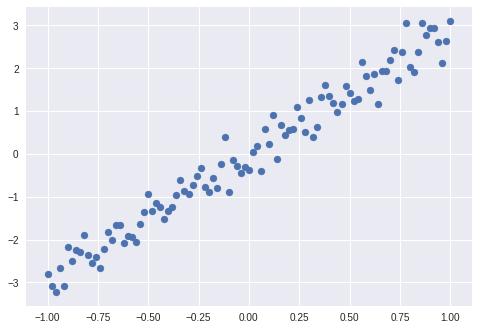

In [112]:
plt.scatter(trainX, trainY)
plt.show()

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
w = tf.Variable(0.0, name = 'weights')
init = tf.global_variables_initializer()

In [0]:
y_model = tf.multiply(X, w)
cost =(tf.pow(Y - y_model, 2))

In [118]:
cost

<tf.Tensor 'Pow:0' shape=<unknown> dtype=float32>

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [120]:
train_op

<tf.Operation 'GradientDescent' type=NoOp>

In [0]:
sess = tf.Session()
sess.run(init)

In [0]:
for i in range(100):
    for(x, y) in zip(trainX, trainY):
        sess.run(train_op, feed_dict = {X: x, Y:y})

In [125]:
print(sess.run(w))

2.9188895
